In [4]:
!pip install -q roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 120.6 MB/s eta 0:00:00


In [5]:
!nvidia-smi

Wed Oct 15 16:33:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from roboflow import Roboflow
from google.colab import userdata

api_key = userdata.get('Roboflow')
rf = Roboflow(api_key=api_key)
project = rf.workspace("aboubakr-tahir-qzdqb").project("rock-paper-scissors-sxsw-84uth")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rock-paper-scissors-1 in yolov8:: 100%|██████████| 15054/15054 [00:02<00:00, 6265.33it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
from ultralytics import YOLO

# 1. Load a pretrained YOLOv8 model
# 'yolov8n.pt' is the smallest and fastest version.
model = YOLO('yolov8n.pt')

results = model.train(
   data='/content/rock-paper-scissors-1/data.yaml', # Path to your data.yaml
   epochs=3,                                      # How many times to go through the data
   imgsz=640,                                      # Image size (must match preprocessing)
   project='/content/drive/MyDrive/my_first_yolo_project',                # It will create this folder
   name='rps_training_run_1'                       # It will create a subfolder with this name
)

Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/rock-paper-scissors-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=rps_training_run_1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective

In [10]:
# Load your BEST trained model
model = YOLO('/content/drive/MyDrive/my_first_yolo_project/rps_training_run_1/weights/best.pt')

# Evaluate its performance on the test set
metrics = model.val() # It will find the test set from your data.yaml

Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1285.5±435.9 MB/s, size: 35.0 KB)
val: Scanning /content/rock-paper-scissors-1/valid/labels.cache... 604 images, 251 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 604/604 1.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 38/38 5.0it/s 7.6s
                   all        604        418      0.672      0.736      0.766       0.52
                 Paper        139        146       0.82      0.531      0.718       0.44
                  Rock        128        150      0.446      0.907        0.8      0.561
              Scissors        118        122      0.749       0.77       0.78      0.561
Speed: 1.1ms preprocess, 4.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/runs/detect/val


image 1/1 /content/WIN_20251015_17_14_45_Pro.jpg: 384x640 2 Scissorss, 6.9ms
Speed: 2.2ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


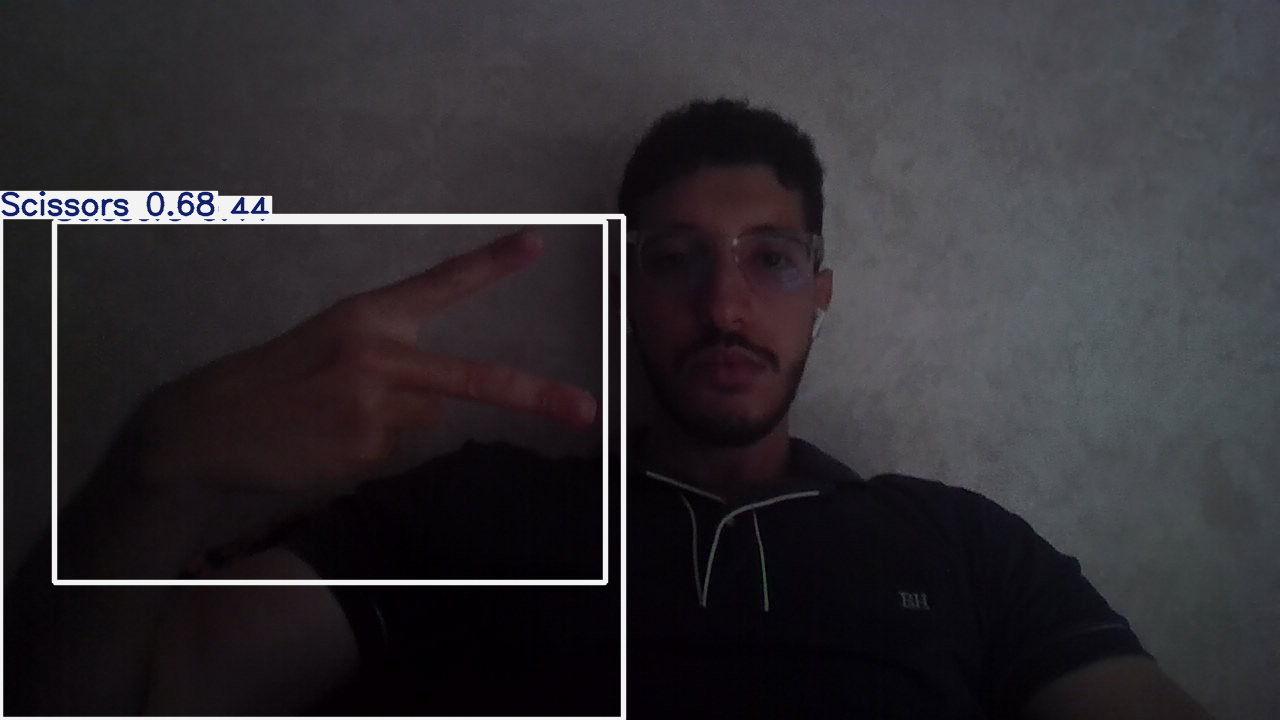

In [12]:
# Run prediction on a new image
results = model('/content/WIN_20251015_17_14_45_Pro.jpg')

# Show the results
for r in results:
    r.show() # This will display the image with the bounding box drawn on it